In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.ioff()

In [2]:
D = []
for name in tqdm(glob.glob('i_3*')):
    _, n, spam, avgover, batches, batchsize, gamma, dynamics = name.split('/')[-1].split('_')
    with open(name,'r') as f:
        ds = eval(f.read())
        d = pd.DataFrame(ds)
        d['epoch'] = d.index
        d['n'] = int(n)
        d['spam'] = float(spam)
        d['avgover'] = float(avgover)
        d['batches'] = int(batches)
        d['batchsize'] = int(batchsize)
        d['gamma'] = float(gamma)
        d['dynamics'] = dynamics
        D.append(d)
D = pd.concat(D,ignore_index=True)
Dlast = D.loc[D.groupby(['n', 'spam', 'avgover', 'batches', 'batchsize', 'gamma', 'dynamics'])['epoch'].idxmax()]

100%|██████████| 36/36 [00:01<00:00, 24.00it/s]


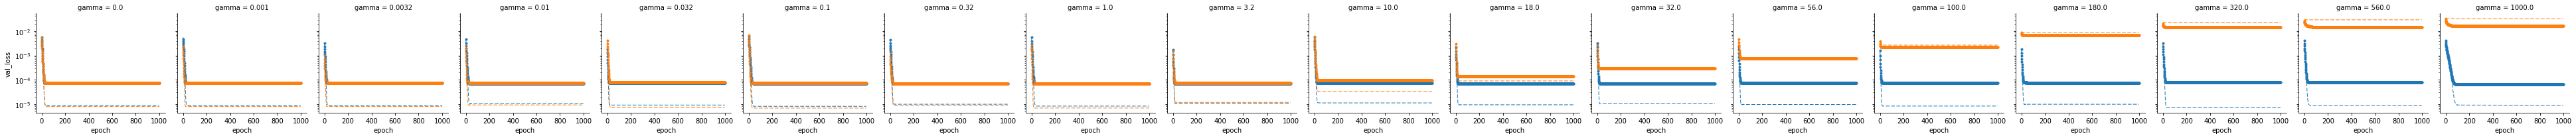

In [3]:
fg = sns.FacetGrid(D, col='gamma', hue='dynamics')
fg.map(plt.semilogy,'epoch','loss', marker='.', linewidth=0)
fg.map(plt.semilogy,'epoch','val_loss', linewidth=1, linestyle='dashed')

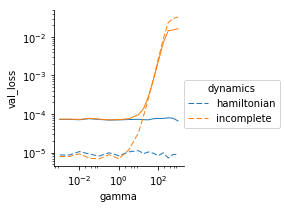

In [4]:
fg = sns.FacetGrid(Dlast, hue='dynamics')
fg.map(plt.loglog,'gamma','loss', linewidth=1)
fg.map(plt.loglog,'gamma','val_loss', linewidth=1, linestyle='dashed')
fg.add_legend()

Text(0,0.5,'Cost')

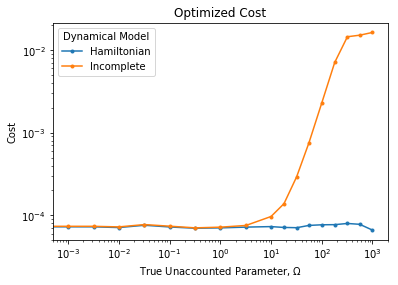

In [3]:
plt.figure()
plt.loglog(Dlast[Dlast.dynamics=='hamiltonian'].gamma, Dlast[Dlast.dynamics=='hamiltonian'].loss, '.-')
plt.loglog(Dlast[Dlast.dynamics=='incomplete'].gamma, Dlast[Dlast.dynamics=='incomplete'].loss, '.-')
plt.legend(['Hamiltonian','Incomplete'],title='Dynamical Model')
plt.title('Optimized Cost')
plt.xlabel('True Unaccounted Parameter, $\Omega$')
plt.ylabel('Cost')

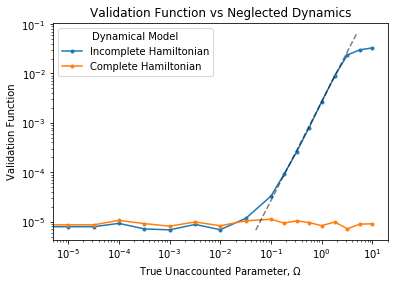

In [4]:
plt.figure()
plt.loglog(Dlast[Dlast.dynamics=='incomplete'].gamma/100, Dlast[Dlast.dynamics=='incomplete'].val_loss, '.-')
plt.loglog(Dlast[Dlast.dynamics=='hamiltonian'].gamma/100, Dlast[Dlast.dynamics=='hamiltonian'].val_loss, '.-')
l = np.array([0.05,5])
v = float(Dlast[(Dlast.dynamics=='incomplete') & (Dlast.gamma==100)].val_loss)
plt.loglog(l,v*l**2,'k--',alpha=0.5,zorder=10)
plt.legend(['Incomplete Hamiltonian','Complete Hamiltonian'],title='Dynamical Model')
plt.title('Validation Function vs Neglected Dynamics')
plt.xlabel('True Unaccounted Parameter, $\Omega$')
plt.ylabel('Validation Function')
plt.savefig('incomplete.png', dpi=400)